## Data Investigation 

In [2]:
#importing libraries 
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
## data acquisition : Spaced repetition DATA from Duolingo Research 
dataframe = pd.read_csv("/Users/zeinebouerghi/Downloads/duolingodata.csv.gz")
#Data Cleaning and Manipulation 
#adding variables : adding number of mistakes made 
dataframe['mistakes'] = dataframe.history_seen - dataframe.history_correct
dataframe['session_mistakes'] = dataframe.session_seen - dataframe.session_correct
dataframe['rate_of_error_per_session'] = dataframe.session_mistakes/dataframe.session_seen
dataframe['general_rate_of_error'] = dataframe.mistakes/dataframe.history_seen 
# unit='s' to convert it into epoch time
dataframe['Datetime'] = pd.to_datetime(dataframe['timestamp'], 
                                  unit='s')
dataframe.tail()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error,Datetime
12854221,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,5,4,2,1,0.200000,0.333333,2013-03-12 16:14:57
12854222,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,5,4,0,1,0.200000,0.000000,2013-03-12 16:14:57
12854223,1.000000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,4,4,0,0,0.000000,0.000000,2013-03-12 16:14:57
12854224,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,5,3,1,2,0.400000,0.333333,2013-03-12 16:14:57
12854225,0.666667,1363104897,368,u:i5D8,en,it,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,5,3,9,6,2,3,0.333333,0.400000,2013-03-12 16:14:57


In [4]:
#print the size of the data 
print("The size of the data is :\n" , len(dataframe))

The size of the data is :
 12854226


In [4]:
#look at the description of the dataset 
print("The description of the dataset \n")
dataframe.describe()

The description of the dataset 



,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error
count,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07
mean,8.961056e-01,1.362589e+09,7.295811e+05,2.198109e+01,1.935025e+01,1.817686e+00,1.644134e+00,2.630836e+00,1.735520e-01,1.038944e-01,9.940812e-02
std,2.714048e-01,2.932082e+05,2.246499e+06,1.295508e+02,1.119681e+02,1.360180e+00,1.318794e+00,2.693673e+01,4.135321e-01,2.714048e-01,1.363249e-01
min,0.000000e+00,1.362076e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.362343e+09,5.320000e+02,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.362591e+09,7.713400e+04,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.571429e-02
75%,1.000000e+00,1.362846e+09,4.425070e+05,1.500000e+01,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.666667e-01
max,1.000000e+00,1.363105e+09,4.032836e+07,1.351800e+04,1.288800e+04,2.000000e+01,2.000000e+01,2.457000e+03,1.100000e+01,1.000000e+00,9.545455e-01


In [93]:
#look at the information of the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854226 entries, 0 to 12854225
Data columns (total 17 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   p_recall                   float64       
 1   timestamp                  int64         
 2   delta                      int64         
 3   user_id                    object        
 4   learning_language          object        
 5   ui_language                object        
 6   lexeme_id                  object        
 7   lexeme_string              object        
 8   history_seen               int64         
 9   history_correct            int64         
 10  session_seen               int64         
 11  session_correct            int64         
 12  mistakes                   int64         
 13  session_mistakes           int64         
 14  rate_of_error_per_session  float64       
 15  general_rate_of_error      float64       
 16  Datetime                   datetim

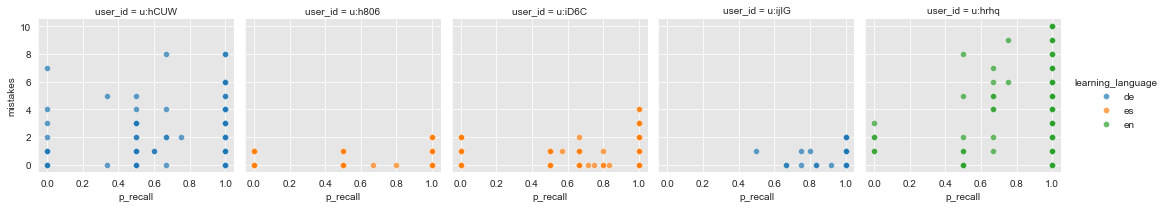

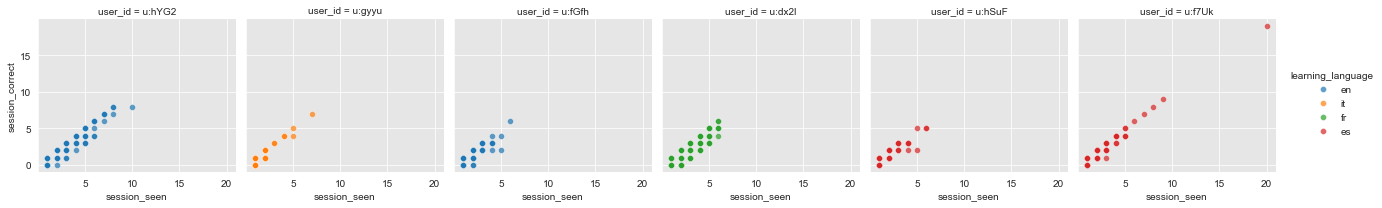

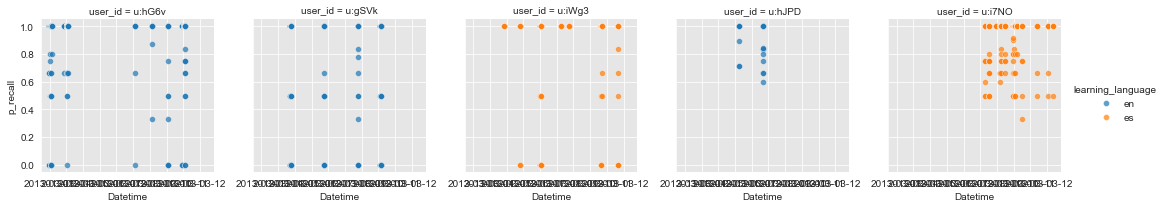

In [35]:
#individual user visualization 
def individual_user_viz(n, xaxis, yaxis):
    """
    This function is supposed to show graphs of numerical columns as histograms 
    for random individual users 
    n: the number of the users to pick 
    xaxis: the picked x_axis (p_recall, session_mistakes, session_correct, history_correct,etc)
    yaxis: the picked yaxis 
    """
    #select random users 
    random_users = random.sample(list(dataframe['user_id']), n)
    #frame their rows from the originial data 
    rslt_df = dataframe[dataframe['user_id'].isin(random_users)]
    #visualize a histogram for each 
    g = sns.FacetGrid(rslt_df, col="user_id", hue="learning_language")
    g.map(sns.scatterplot, xaxis, yaxis, alpha=.7)
    g.add_legend()
    return g 

# look at the p_recall and mistakes histograms of 5 users 
individual_user_viz(5, 'p_recall', 'mistakes') 
#look at the session correct and session seen of 6 users
individual_user_viz(6, 'session_seen', 'session_correct') 
#look ath 
individual_user_viz(5, 'Datetime', 'p_recall')

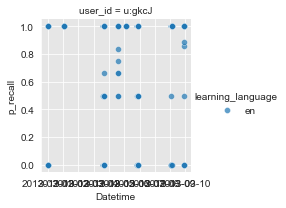

In [75]:
individual_user_viz(1, 'Datetime', 'p_recall')

In [72]:
# size of compressed data 
print("the compressed data is of a size : \n", len(df) )
#glimpse of the aggregated data 
df.head()

the compressed data is of a size : 
 115222


user_id  p_recall                                             mistakes      \
               mean  max      mean       std count         sum      mean max   
0   u:--N  0.809896  1.0  0.809896  0.371012    32   25.916667  0.531250   3   
1   u:--U  0.928571  1.0  0.928571  0.188982     7    6.500000  0.285714   1   
2   u:-3I  0.900000  1.0  0.900000  0.144115    14   12.600000  1.000000   3   
3   u:-3n  0.829973  1.0  0.829973  0.364467   124  102.916667  2.629032  16   
4   u:-4V  0.874419  1.0  0.874419  0.328614   215  188.000000  1.213953  10   

             ... rate_of_error_per_session                             \
       mean  ...                      mean       std count        sum   
0  0.531250  ...                  0.190104  0.371012    32   6.083333   
1  0.285714  ...                  0.071429  0.188982     7   0.500000   
2  1.000000  ...                  0.100000  0.144115    14   1.400000   
3  2.629032  ...                  0.170027  0.364467   124  21.083333   
4  1.213953  ...                  0.125581  0.328614   215  27.000000   

  general_rate_of_error                                                 
                   mean       max      mean       std count        sum  
0              0.124590  0.666667  0.124590  0.207687    32   3.986893  
1              0.095238  0.333333  0.095238  0.162650     7   0.666667  
2              0.095147  0.285714  0.095147  0.103228    14   1.332051  
3              0.105501  0.571429  0.105501  0.096170   124  13.082094  
4              0.067608  0.500000  0.067608  0.088847   215  14.535643  

[5 rows x 55 columns]

In [16]:
def plot_stats(data, x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(11, 4.5))
    sns.lineplot(data=data, x=x, y=y ,legend = False, palette="deep", color = 'green')
    plt.xticks(rotation=70)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    return plt 
    

In [28]:
#grouping by the user_id to compress the users
df = dataframe.groupby(['user_id'], as_index=False)
aggregations = ["mean", "max", "mean","std","count","sum"]
#aggregatign by the variables to get summary statistics with aggregation function
#for i in range( len(aggregations)):     
df = df.agg({"p_recall": aggregations , 
                "mistakes":aggregations,
                "history_seen":aggregations,
                "history_correct":aggregations,
                "session_seen":aggregations,
                "session_correct":aggregations,
                "mistakes":aggregations,
                "session_mistakes":aggregations,
                "rate_of_error_per_session":aggregations,
                "general_rate_of_error":aggregations})
    #plot_stats(df[10:], "user_id","p_recall",'','','' )

In [29]:
df[:10]

user_id  p_recall                                             mistakes      \
               mean  max      mean       std count         sum      mean max   
0   u:--N  0.809896  1.0  0.809896  0.371012    32   25.916667  0.531250   3   
1   u:--U  0.928571  1.0  0.928571  0.188982     7    6.500000  0.285714   1   
2   u:-3I  0.900000  1.0  0.900000  0.144115    14   12.600000  1.000000   3   
3   u:-3n  0.829973  1.0  0.829973  0.364467   124  102.916667  2.629032  16   
4   u:-4V  0.874419  1.0  0.874419  0.328614   215  188.000000  1.213953  10   
5   u:-4y  0.943543  1.0  0.943543  0.130909    68   64.160897  1.588235  10   
6   u:-5I  0.884615  1.0  0.884615  0.313334    39   34.500000  0.820513   5   
7   u:-69  0.811111  1.0  0.811111  0.361142    15   12.166667  0.466667   3   
8   u:-7F  0.659195  1.0  0.659195  0.463842   290  191.166667  6.141379  31   
9   u:-7U  1.000000  1.0  1.000000  0.000000     8    8.000000  3.125000   7   

             ... rate_of_error_per_session                             \
       mean  ...                      mean       std count        sum   
0  0.531250  ...                  0.190104  0.371012    32   6.083333   
1  0.285714  ...                  0.071429  0.188982     7   0.500000   
2  1.000000  ...                  0.100000  0.144115    14   1.400000   
3  2.629032  ...                  0.170027  0.364467   124  21.083333   
4  1.213953  ...                  0.125581  0.328614   215  27.000000   
5  1.588235  ...                  0.056457  0.130909    68   3.839103   
6  0.820513  ...                  0.115385  0.313334    39   4.500000   
7  0.466667  ...                  0.188889  0.361142    15   2.833333   
8  6.141379  ...                  0.340805  0.463842   290  98.833333   
9  3.125000  ...                  0.000000  0.000000     8   0.000000   

  general_rate_of_error                                                 
                   mean       max      mean       std count        sum  
0              0.124590  0.666667  0.124590  0.207687    32   3.986893  
1              0.095238  0.333333  0.095238  0.162650     7   0.666667  
2              0.095147  0.285714  0.095147  0.103228    14   1.332051  
3              0.105501  0.571429  0.105501  0.096170   124  13.082094  
4              0.067608  0.500000  0.067608  0.088847   215  14.535643  
5              0.080605  0.250000  0.080605  0.064881    68   5.481115  
6              0.198699  0.750000  0.198699  0.256453    39   7.749242  
7              0.108333  0.375000  0.108333  0.160450    15   1.625000  
8              0.179665  0.800000  0.179665  0.158040   290  52.102780  
9              0.096427  0.235294  0.096427  0.060695     8   0.771419  

[10 rows x 55 columns]

In [67]:
# Define a custom function
def custom(x):
    return x.max() - x.min()

X = dataframe.groupby("user_id").agg(
    avg_p_recall = ("p_recall","mean"),
    avg_mistakes = ("mistakes","mean"),
    product_count = ("session_seen","mean"),
    avg_sales = ("session_correct","mean"), 
    #duration = ("Datetime", "custom")
)

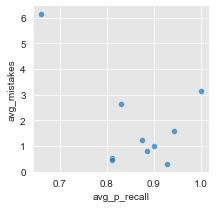

In [64]:
g = sns.FacetGrid(X)
g.map(sns.scatterplot, "avg_p_recall", "avg_mistakes", alpha=.7)
g.add_legend()


<AxesSubplot: xlabel='user_id', ylabel='avg_p_recall'>

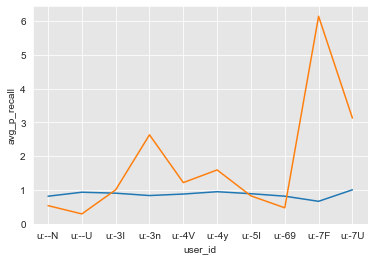

In [56]:
sns.lineplot(data=X, x="user_id", y="avg_p_recall")
sns.lineplot(data=X, x="user_id", y="avg_mistakes")

In [ ]:
#grouping by the user_id to compress the users
df = dataframe.groupby(['user_id'], as_index=False)
aggregations = ["mean"]#, "max", "mean","std","count","sum"]
#aggregatign by the variables to get summary statistics with aggregation function
#for i in range( len(aggregations)):     
df = df.agg(average_p_recall: ("p_recall", aggregations) )
               # "mistakes":aggregations, "history_seen":aggregations,
               # "history_correct":aggregations,
               # "session_seen":aggregations,
               # "session_correct":aggregations,
              #  "mistakes":aggregations, "session_mistakes":aggregations, "rate_of_error_per_session":aggregations,"general_rate_of_error":aggregations})

In [25]:
df[:10]

,user_id,p_recall,mistakes,history_seen,history_correct,session_seen,session_correct,session_mistakes,rate_of_error_per_session,general_rate_of_error
,,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,u:--N,0.809896,0.531250,5.625000,5.093750,1.312500,1.062500,0.250000,0.190104,0.124590
1,u:--U,0.928571,0.285714,2.857143,2.571429,2.857143,2.714286,0.142857,0.071429,0.095238
2,u:-3I,0.900000,1.000000,8.428571,7.428571,3.428571,3.000000,0.428571,0.100000,0.095147
3,u:-3n,0.829973,2.629032,21.854839,19.225806,1.185484,0.991935,0.193548,0.170027,0.105501
4,u:-4V,0.874419,1.213953,17.879070,16.665116,1.679070,1.548837,0.130233,0.125581,0.067608
5,u:-4y,0.943543,1.588235,19.529412,17.941176,3.926471,3.676471,0.250000,0.056457,0.080605
6,u:-5I,0.884615,0.820513,4.512821,3.692308,1.025641,0.897436,0.128205,0.115385,0.198699
7,u:-69,0.811111,0.466667,4.933333,4.466667,2.600000,2.266667,0.333333,0.188889,0.108333
8,u:-7F,0.659195,6.141379,30.089655,23.948276,1.131034,0.768966,0.362069,0.340805,0.179665


In [ ]:
#grouping by the user_id to compress the users
df = dataframe.groupby(['user_id'], as_index=False)
aggregations = ["mean", "max", "mean","std","count","sum"]
#aggregatign by the variables to get summary statistics with aggregation function
for i in range(len(aggregations)):     
    df = df.agg({"p_recall": aggregations[i] , 
                "mistakes":aggregations[i],
                "history_seen":aggregations[i],
                "history_correct":aggregations[i],
                "session_seen":aggregations[i],
                "session_correct":aggregations[i],
                "mistakes":aggregations[i],
                "session_mistakes":aggregations[i],
                "rate_of_error_per_session":aggregations[i],
                "general_rate_of_error":aggregations[i]})
    #plot_stats(df[10:], "user_id","p_recall",'','','' )

In [44]:
trial = dataframe.groupby(['user_id'], as_index=False)
trial = trial.agg({"p_recall": ["count","sum"], "mistakes": ["count","sum"],"Datetime"})
trial["mean_recall"] = (
    trial.p_recall["sum"] / trial.p_recall["count"]
) * 100

In [45]:
#mean recall degree rate 
trial["mean_recall_rate"] = (
    trial.p_recall["sum"] / trial.p_recall["count"]
) * 100

#mean_mistakes_rate 
trial["mean_mistakes_rate"] = (trial.mistakes["sum"] / trial.mistakes["count"]
) * 100
trial1 = trial[:110]

<module 'matplotlib.pyplot' from '/Users/zeinebouerghi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

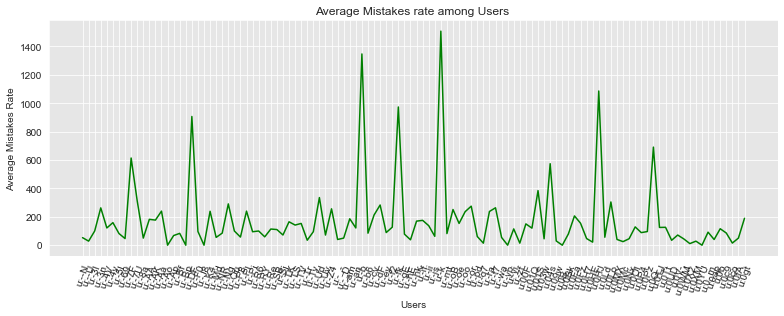

In [70]:
plot_stats(trial1,"user_id","mean_mistakes_rate",'Users','Average Mistakes Rate','Average Mistakes rate among Users ')

<module 'matplotlib.pyplot' from '/Users/zeinebouerghi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

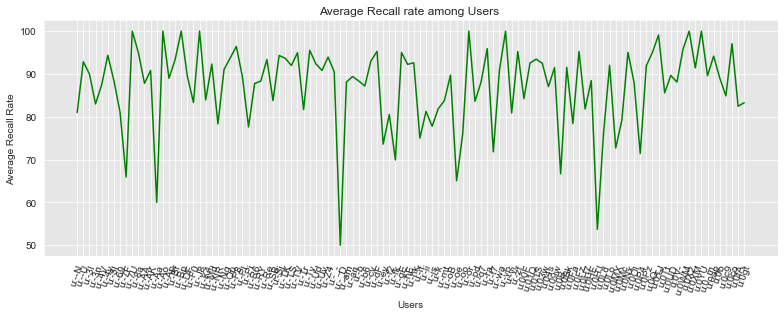

In [68]:
plot_stats(trial1,"user_id","mean_recall_rate",'Users','Average Recall Rate','Average Recall rate among Users ')

In [17]:
trial_data = dataframe.groupby(['user_id'], as_index=False)['lexeme_id'].count().rename(columns = {'lexeme_id': 'Lexeme'})
trial = trial_data.sort_values(by = ['Lexeme'], ascending=False).head(10)

In [28]:
dataframe10 = dataframe[dataframe['learning_language'] == 'de']

In [78]:
max_x = dataframe.loc[dataframe['mistakes'].idxmax(10)]
max_x

p_recall                                                  0.6
timestamp                                          1363066201
delta                                                     144
user_id                                                u:bcH_
learning_language                                          en
ui_language                                                es
lexeme_id                    6d4c572af8022cb4784ce0f8898d1905
lexeme_string                                       to/to<pr>
history_seen                                             5899
history_correct                                          3442
session_seen                                                5
session_correct                                             3
mistakes                                                 2457
session_mistakes                                            2
rate_of_error_per_session                                 0.4
general_rate_of_error                                0.416511
Datetime

In [33]:
sorted_df = dataframe.sort_values(by = 'p_recall', ascending = False)

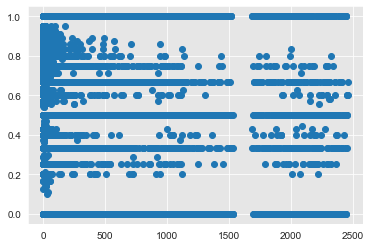

In [37]:
plt.scatter(sorted_df.mistakes, sorted_df.p_recall)

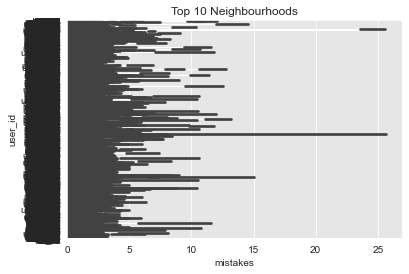

In [30]:
sns.barplot(data= dataframe10, y='user_id', x='mistakes').set_title('Top 10 Neighbourhoods');

In [ ]:
# Split the data into X and y
output_column = ['p_recall']
X = dataframe.iloc[:,1:]
y = dataframe[output_column]

# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

In [ ]:
dataframe.columns

In [ ]:
%matplotlib inline
# Import plotting package
import plotly.express as px

# Put data to plot in dataframe
df_plot = pd.DataFrame({'expected':expected, 'predicted':predicted})

# Make scatter plot from data
fig = px.scatter(
    df_plot, 
    x='expected', 
    y='predicted',
    title='Predicted vs. Actual Values')

# Add straight line indicating perfect model
fig.add_shape(type="line",
    x0=0, y0=0, x1=50, y1=50,
    line=dict(
        color="Red",
        width=4,
        dash="dot",
    )
)

# Show figure
fig.show()

In [ ]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}")